# Logistic 回归
Logistic 回归 或者叫逻辑回归 虽然名字有回归，但是它是用来做分类的。其主要思想是: 根据现有数据对分类边界线(Decision Boundary)建立回归公式，以此进行分类。

## 概念
### Sigmoid函数
我们想要的函数应该是: 能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出 0 或 1.或许你之前接触过具有这种性质的函数，该函数称为 海维塞得阶跃函数(Heaviside step function)，或者直接称为 单位阶跃函数。然而，海维塞得阶跃函数的问题在于: 该函数在跳跃点上从 0 瞬间跳跃到 1，这个瞬间跳跃过程有时很难处理。幸好，另一个函数也有类似的性质（可以输出 0 或者 1 的性质），且数学上更易处理，这就是 Sigmoid 函数。 Sigmoid 函数具体的计算公式如下:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### 基于最优化方法的回归系数确定
Sigmoid函数的输入 $z = w_0x_0+w_1x_1+...+w_nx_n$，采用向量的写法为 $z=w^Tx$。其中的向量 x 是分类器的输入数据，向量 w 也就是我们要找到的最佳参数（系数），从而使得分类器尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。我们这里使用的是——梯度上升法（Gradient Ascent）。

### 梯度上升法
要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。对函数 $f(x,y)$，其在某点的梯度如下
$$
\nabla f(x, y) = \begin{pmatrix}
\frac{\partial f(x, y)}{\partial x} \\
\frac{\partial f(x, y)}{\partial y}
\end{pmatrix}
$$
-   要求函数 f 在该点有定义且可微

梯度上升算法到达每个点后都会重新估计移动的方向。从 P0 开始，计算完该点的梯度，函数就根据梯度移动到下一点 P1。在 P1 点，梯度再次被重新计算，并沿着新的梯度方向移动到 P2 。如此循环迭代，直到满足停止条件。迭代过程中，梯度算子总是保证我们能选取到最佳的移动方向。其中，每次移动的量称为 $\alpha$，梯度上升的迭代公式为：
$$
\mathbf{w} := \mathbf{w} + \alpha \nabla_{\mathbf{w}} f(\mathbf{w})
$$

## 梯度下降法
其实这个两个方法在此情况下本质上是相同的。关键在于代价函数（cost function）或者叫目标函数（objective function）。如果目标函数是损失函数，那就是最小化损失函数来求函数的最小值，就用梯度下降。 如果目标函数是似然函数（Likelihood function），就是要最大化似然函数来求函数的最大值，那就用梯度上升。在逻辑回归中， 损失函数和似然函数无非就是互为正负关系。

梯度下降有可能陷入局部最优点

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def loadDataSet(path):
    dataMat = []
    labelMat = []

    with open(path) as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))

    return dataMat, labelMat

# sigmoid阶跃函数
def sigmoid(inX):
    # return 1.0 / (1 + exp(-inX))

    # Tanh是Sigmoid的变形，与 sigmoid 不同的是，tanh 是0均值的。因此，实际应用中，tanh 会比 sigmoid 更好。
    return 2 * 1.0 / (1 + np.exp(-2 * inX)) - 1

# 梯度上升算法
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    LabelMatrix = np.mat(classLabels).transpose()

    # m 表示样本数，n 表示特征数
    m, n = np.shape(dataMatrix)

    alpha = 0.01
    maxCycles = 5000
    weights = np.ones((n, 1))

    for i in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = LabelMatrix - h
        weights = weights + alpha * dataMatrix.transpose() * error

    return np.array(weights)

# 可视化
def plotBestFit(dataMat, labelMat, weights):
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]

    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []

    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]

    ax.plot(x, y)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

def testLR():
    dataMat, labelMat = loadDataSet('testSet.txt')
    weights = gradAscent(dataMat, labelMat)
    plotBestFit(dataMat, labelMat, weights)

# if __name__ == '__main__':
#     testLR()

## 随机梯度上升
梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为 随机梯度上升算法。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习(online learning)算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理” （batch） 。

随机梯度上升算法与梯度上升算法在代码上很相似，但也有一些区别: 第一，后者的变量 h 和误差 error 都是向量，而前者则全是数值；第二，前者没有矩阵的转换过程，所有变量的数据类型都是 NumPy 数组。

In [102]:
def stoGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    print(weights.shape)
    print(dataMatrix.shape)
    alpha = 0.001

    for i in range(m):
        h = sigmoid(dataMatrix[i] * weights)
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]

    return weights

def testSGA():
    dataMat, labelMat = loadDataSet('testSet.txt')
    weights = stoGradAscent0(np.array(dataMat), labelMat)
    plotBestFit(dataMat, labelMat, weights)

# if __name__ == '__main__':
#     testSGA()

## 随机梯度上升的改进
随机梯度上升的算法在进行过程中，不同系数收敛需要的迭代次数不同

第一处改进为 alpha 的值。alpha 在每次迭代的时候都会调整，这回缓解上面波动图的数据波动或者高频波动。另外，虽然 alpha 会随着迭代次数不断减少，但永远不会减小到 0，因为我们在计算公式中添加了一个常数项。

第二处修改为 randIndex 更新，这里通过随机选取样本拉来更新回归系数。这种方法将减少周期性的波动。这种方法每次随机从列表中选出一个值，然后从列表中删掉该值（再进行下一次迭代）。

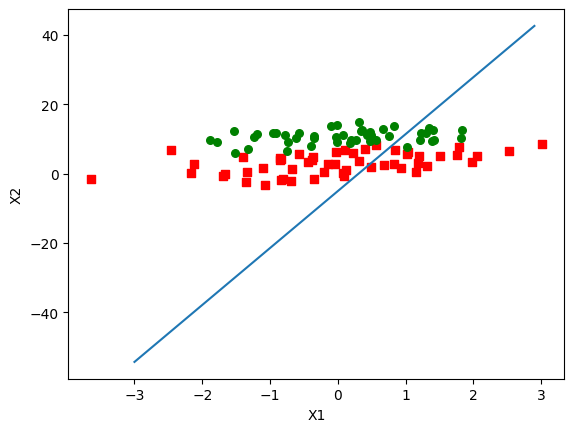

In [103]:
def stoGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.random.randn(n)
    numIter = 300

    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 0.4 / (1.0 + j + i) + 0.0001
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            idx = dataIndex[randIndex]
            h = sigmoid(dataMatrix[idx] * weights)
            error = classLabels[idx] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    
    return weights

def testSGA1():
    dataMat, labelMat = loadDataSet('testSet.txt')
    weights = stoGradAscent1(np.array(dataMat), labelMat)
    plotBestFit(dataMat, labelMat, weights)

if __name__ == '__main__':
    testSGA1()

# 实践2
## 处理缺失值
给出了一些可选的做法:
-   使用可用特征的均值来填补缺失值；
-   使用特殊值来填补缺失值，如 -1；
-   忽略有缺失值的样本；
-   使用有相似样本的均值添补缺失值；
-   使用另外的机器学习算法预测缺失值。

Numpy不允许数据包含缺失值，在逻辑回归中，可以选择用0来填补缺失值，因为这样不会影响到系数的更新

In [104]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []

    for line in frTrain.readlines():
        cur = line.strip().split('\t')
        lineArr = []
        for i in range(len(cur) - 1):
            lineArr.append(float(cur[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(cur[-1]))

    trainWeights = stoGradAscent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0

    for line in frTest.readlines():
        numTestVec += 1.0
        cur = line.strip().split('\t')
        lineArr = []
        for i in range(len(cur) - 1):
            lineArr.append(float(cur[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(cur[-1]):
            errorCount += 1
    
    errorRate = (float(errorCount) / numTestVec)
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0

    for k in range(numTests):
        errorSum += colicTest()

    print('after %d iterations the average error rate is: %f' % (numTests, errorSum / float(numTests)))
          
if __name__ == '__main__':
    multiTest()


C:\Users\26271\AppData\Local\Temp\ipykernel_22972\1892051187.py:22: RuntimeWarning: overflow encountered in exp
  return 2 * 1.0 / (1 + np.exp(-2 * inX)) - 1


the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
after 10 iterations the average error rate is: 0.298507
